# Task 1 - Prediction Using Supervised Machine Learning
---
<p 
    style ='font-size:140%;color:orange;opacity:.88;text-align:center;'>
    <em style='text-transform:uppercase;''
        >
        <!--Link Refers To My LinkedIn Profile-->
        <a 
            style='color:blueviolet;opacity:.82;text-decoration:none;' 
            href='https://www.linkedin.com/in/nandhakumarsj/'
            >
                Nandhakumar S J
        </a>
        </em>
    <br />
    <span> 
        A Project for an internship at "The Sparks Foundation"
        <br/>
        DOMAIN : Data Science & Business Analytics
        <br/>
        Batch - June 2023
    </span>
</p>
<hr/>
<h2> Importing Modules </h2>

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Loading Dataset

In [2]:
data = pd.read_csv(r'./Datasets/student_scores.csv')
print("size:",data.size,"; shape",data.shape)
data.head(10)

size: 50 ; shape (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Visualizing The Scores

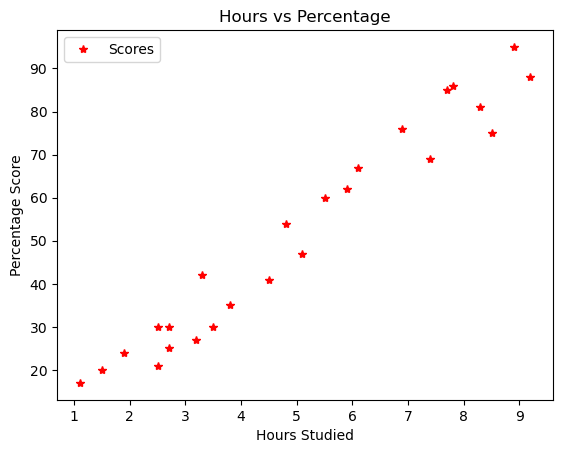

In [3]:
data.plot(x='Hours', y='Scores', style='*', c="red")  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Processing The Dataset

In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

---
## Training The Linear Regression Model Of Scikit Learn

In [5]:
lin_regressor = LinearRegression()
lin_regressor.fit(X_train.values, y_train)
print("Training Completed ✔")

Training Completed ✔


### Predicting Regression Line

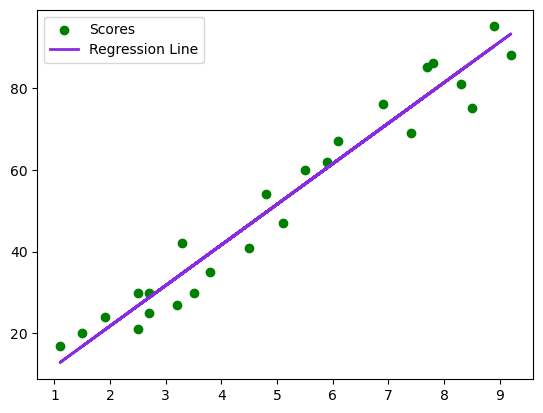

In [6]:
y_line = lin_regressor.coef_ * X + lin_regressor.intercept_
plt.scatter(X, y, marker='o', c='green', label="Scores")
plt.plot(X.values, y_line, c="blueviolet", linewidth=2, label="Regression Line")
plt.legend()
plt.show()

---
## Testing Model

In [7]:
print("Testing Data\n"+"-"*13, X_test, sep='\n')
y_pred = lin_regressor.predict(X_test.values)

Testing Data
-------------
    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


---
### Comparing The Scores

In [8]:
print(" Comparing Actual Vs. Predicted ".center(45, "*"))
temp = pd.DataFrame(
    {
        'Actual':y_test,
        'Predicted':y_pred
    }
)
temp

******* Comparing Actual Vs. Predicted ******


,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


---
### Visualizing the Predicted Scores

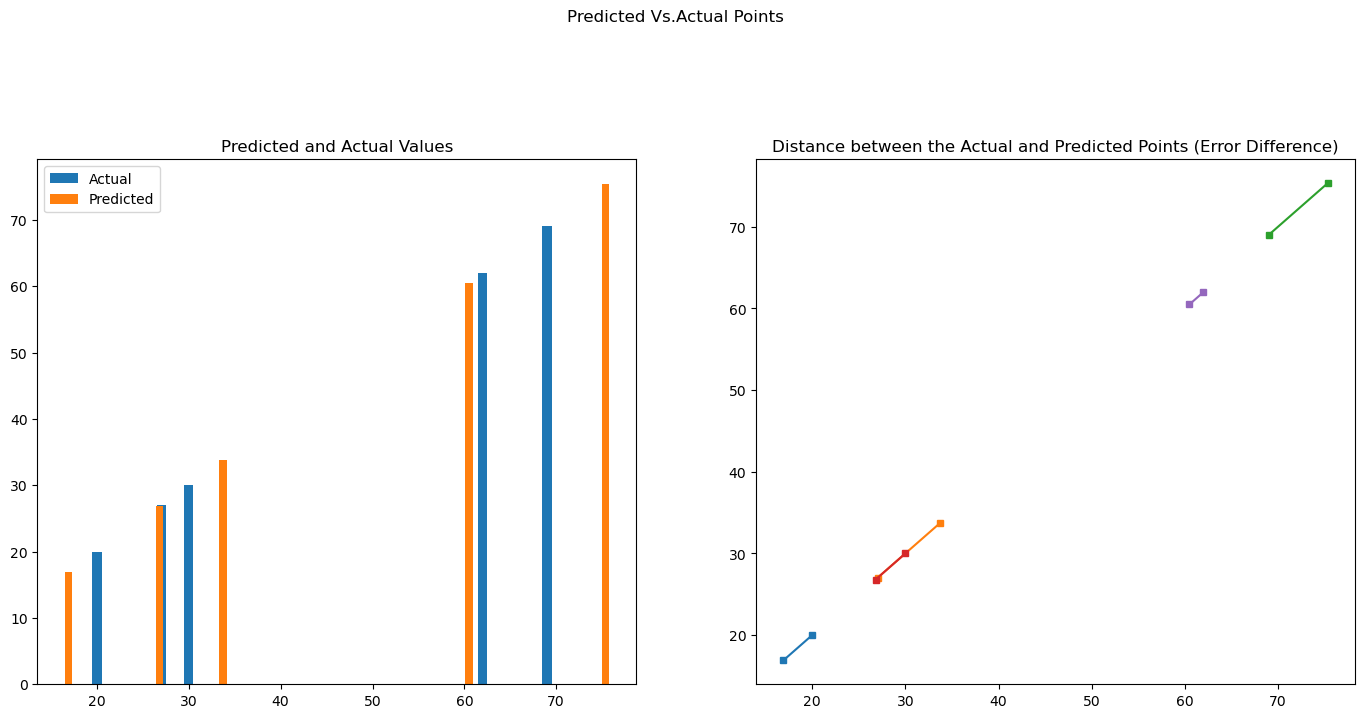

In [9]:
plt.figure(num=2,figsize=(17,15))
plt.subplot(222)
plt.plot([y_test.values, y_pred],[y_test.values,y_pred], 's-',markersize=5, )
plt.suptitle("Predicted Vs.Actual Points")
plt.title(label='Distance between the Actual and Predicted Points (Error Difference)')
plt.subplot(221)
plt.bar(y_test, y_test, width=1, label="Actual")
plt.bar(y_pred, y_pred, width=.8, label="Predicted")
plt.legend()
plt.title("Predicted and Actual Values")
plt.show()

---
## Predicting Scores For Sample Hours

In [10]:
hours = 9.25
scores = lin_regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(scores[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


---
## Calculating `Mean Squared Error` and `R2` Score

In [11]:
print(f"Mean Squared Error is : {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score is : {lin_regressor.score(X_test.values, y_test)}")

Mean Squared Error is : 21.5987693072174
R2 Score is : 0.9454906892105356
